In [1]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision
import torchvision.utils as vutils
from torch.autograd import Variable
from architecture import Generator, Discriminator
from dataset import Dataset
from PIL import Image
from matplotlib import pyplot as plt


def get_data_loader(mode = 'train', root = 'output'):

	transform = {
		'train': transforms.Compose([
			transforms.Resize([100, 100]),  # Resize the images
			transforms.RandomHorizontalFlip(),  # Flip the data horizontally
			transforms.ToTensor(),
			#transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
		]),

		'train': transforms.Compose([
			transforms.Resize([100, 100]),
			transforms.RandomHorizontalFlip(),
			transforms.ToTensor(),
			#transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
		])
	}
	data = torchvision.datasets.ImageFolder(root=root, transform=transform['train'] if mode == 'train' else transform['test'])
	data_loader = torch.utils.data.DataLoader(dataset=data, batch_size=32, shuffle=True, num_workers=4)

	return data_loader



In [ ]:
transform = transforms.Compose([
			transforms.Resize([100, 100]),  # Resize the images
			transforms.RandomHorizontalFlip(),  # Flip the data horizontally
			transforms.ToTensor()])

dd_real = Dataset(img_dir='output/real_imgs', transform=transform)
dd_real_loader = torch.utils.data.DataLoader(dd_real, batch_size=32, num_workers=2)

dd_cropped = Dataset(img_dir = 'output/cropped_imgs', transform=transform)
dd_cropped_loader = torch.utils.data.DataLoader(dd_cropped, batch_size=32, num_workers=2)

concat = torch.utils.data.ConcatDataset([dd_real, dd_cropped])
dloader = torch.utils.data.DataLoader(dd_cropped, batch_size=32, num_workers=2)

torch.Size(dloader.dataset)

# trans = transforms.ToPILImage()
# tt = trans(dd_real_loader.dataset)
# plt.imshow(tt)

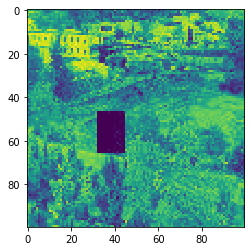

In [57]:
import numpy as np
from matplotlib import pyplot as plt
p = Image.open('output/crops/crop_38.jpg')
pep = Image.open('output/cropped_imgs/cropped_38.jpg')
pp = Image.open('output/targets/target_38.jpg')
n = np.asarray(pep)
nnn = np.asarray(pp)
plt.imshow(n)
